# Project 2 : 
# DSI-MiSK-01: Regression

## Step 1: Load the data and perform basic operations.

In [1]:
# Import some necessary librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew
from scipy.special import boxcox1p

In [2]:
# load the train and test datasets in  pandas dataframe
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
# display the first five rows of the train dataset.
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


#### 1- Understand Problem and features:

In [4]:
# Number of observations in trainset
print('Observations Number in the Trainset: {}'.format(len(train_data)))

Observations Number in the Trainset: 2051


In [5]:
# number of features for each train and test set
print('Features Number in trainset: {}'.format(len(train_data.columns)))
print('Features Number in testset: {}'.format(len(test_data.columns)))


Features Number in trainset: 82
Features Number in testset: 80


In [6]:
# Features names:
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
# rename Columns by removing space to be accessible easier
train_data.columns = train_data.columns.str.replace(' ','_')
test_data.columns = test_data.columns.str.replace(' ','_')

#### 2- Univariable (Target) Study:

In [8]:
# home price 
train_data['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

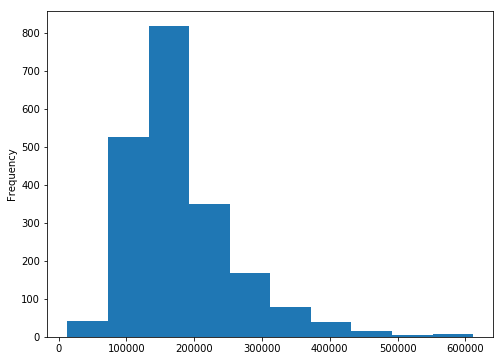

In [9]:
# Plot the Target distribution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
train_data['SalePrice'].plot(kind='hist',
       ax=ax)

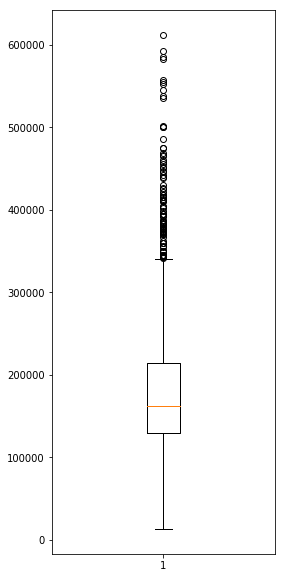

In [10]:
fig , ax = plt.subplots(figsize=(4, 10))
plt.boxplot(train_data['SalePrice']);

###### The target looks like it is skewed right distributed (we might need to do logarithm scaling to normalize its distribution)

#### 3- Multivariate Study:

In [11]:
def correlation_heat_map(df):
    '''
    drow half correlation map for givin dataframe
    
    *args:
        df: dataframe
    
    *return:
        corr_: correlation matrix for the dataframe
    '''
    #correlation
    corr_ = df.corr()
    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(35, 24))
    
    #create mask for the upper triangle 
    mask = np.zeros_like(corr_, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Plot the heatmap with Seaborn.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corr_, mask=mask, annot=True, cmap=cmap)
    
    # Resize the lable 
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=80)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    
    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
    return corr_


#### Trainset Correlation:

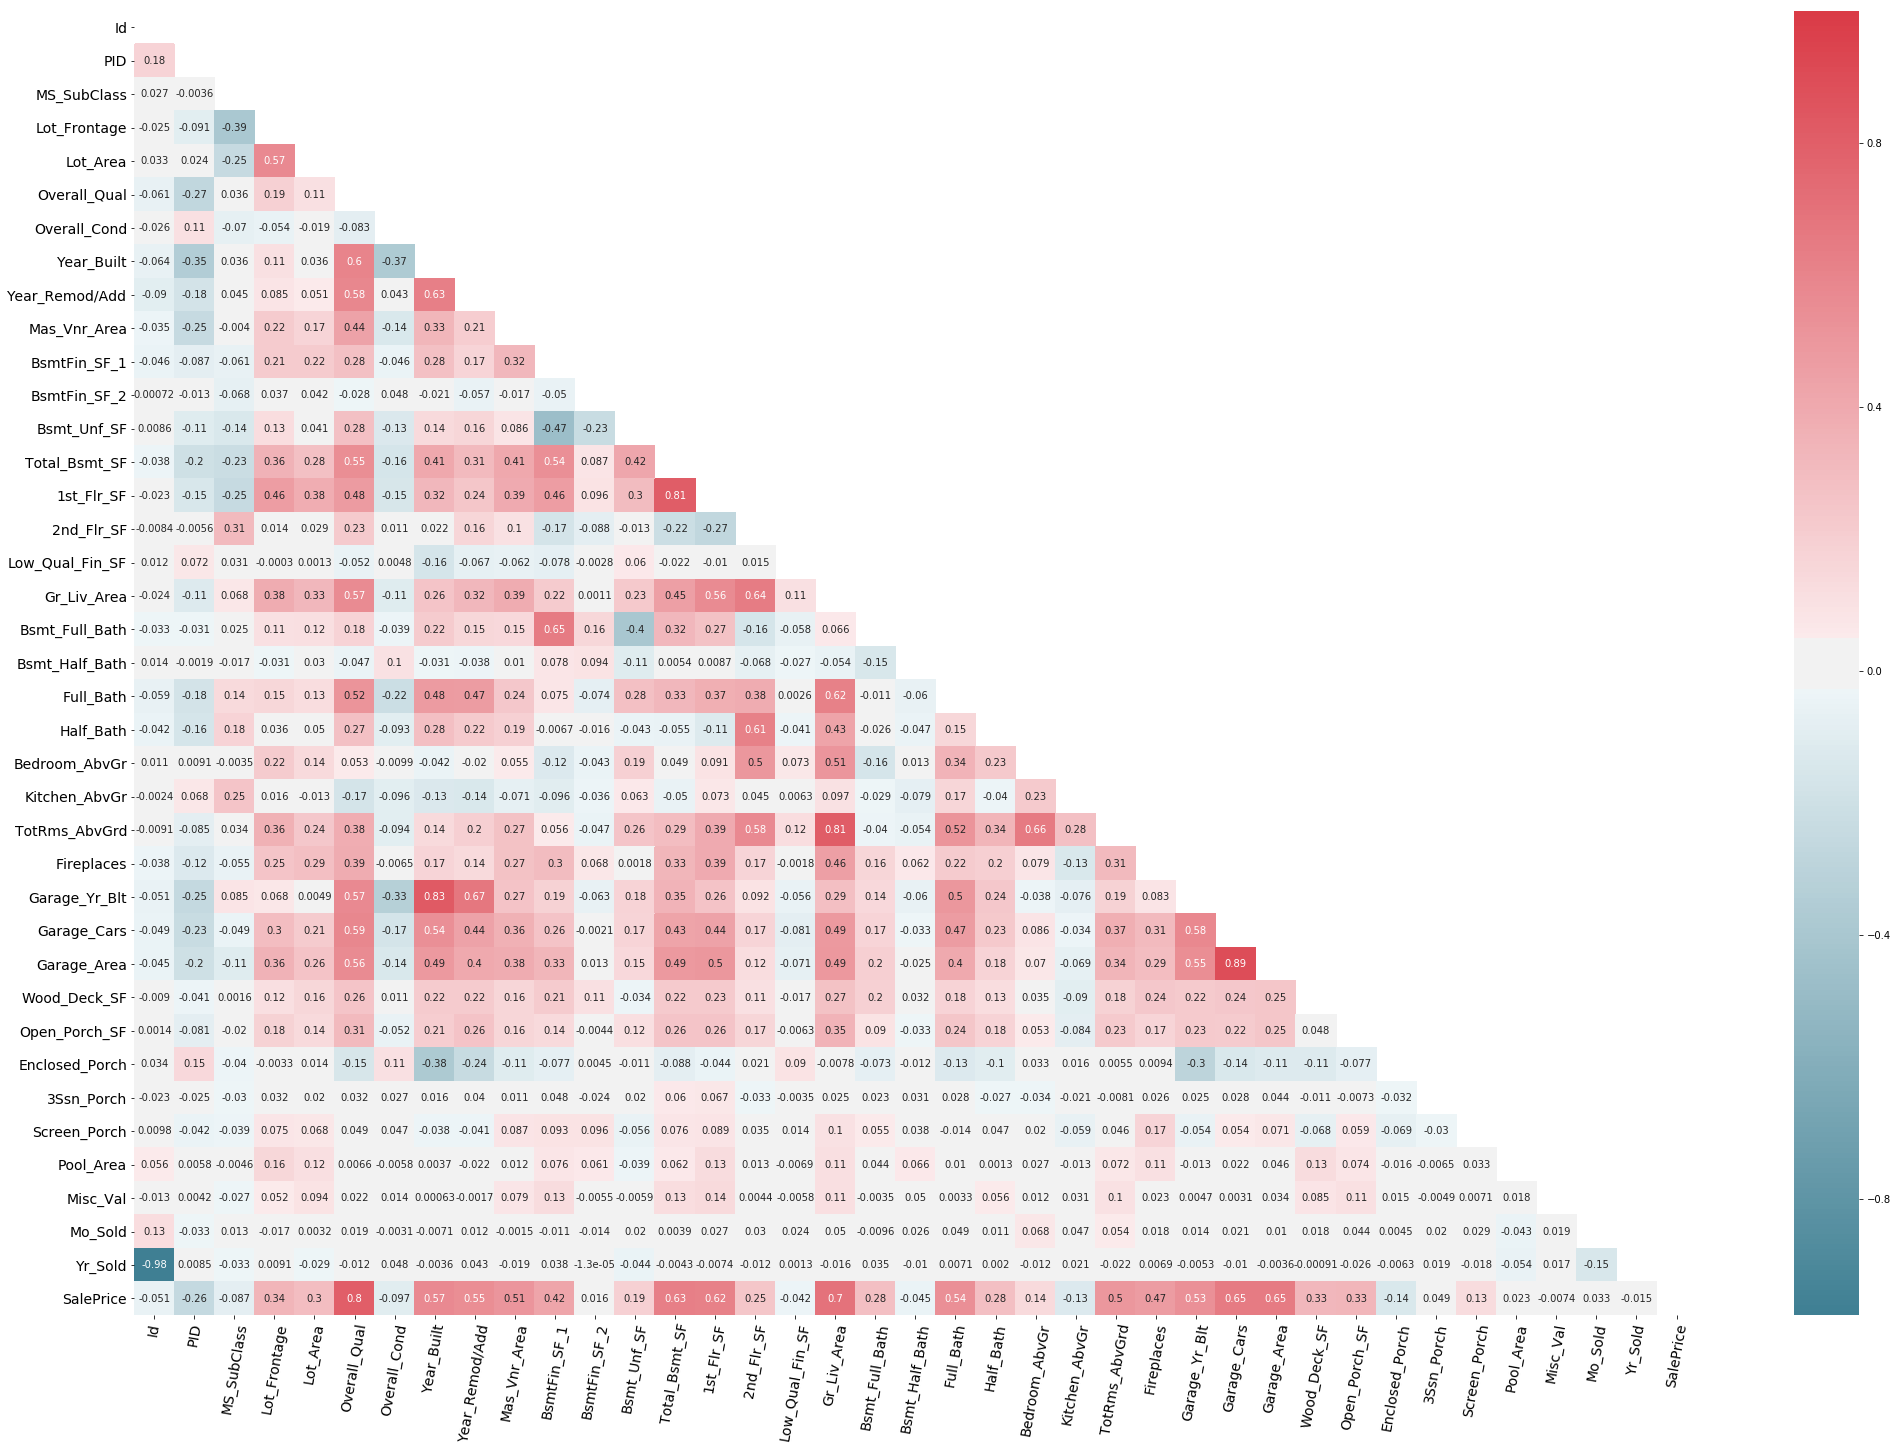

In [12]:
train_corr = correlation_heat_map(train_data)

In [13]:
# get the largest correlated variables with the target
top_k = 10
top_corr_k = pd.DataFrame(train_corr.nlargest(top_k, 'SalePrice')['SalePrice'])

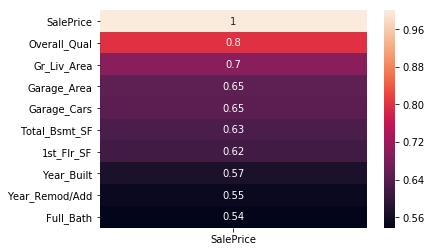

In [14]:
sns.heatmap(top_corr_k, annot=True)

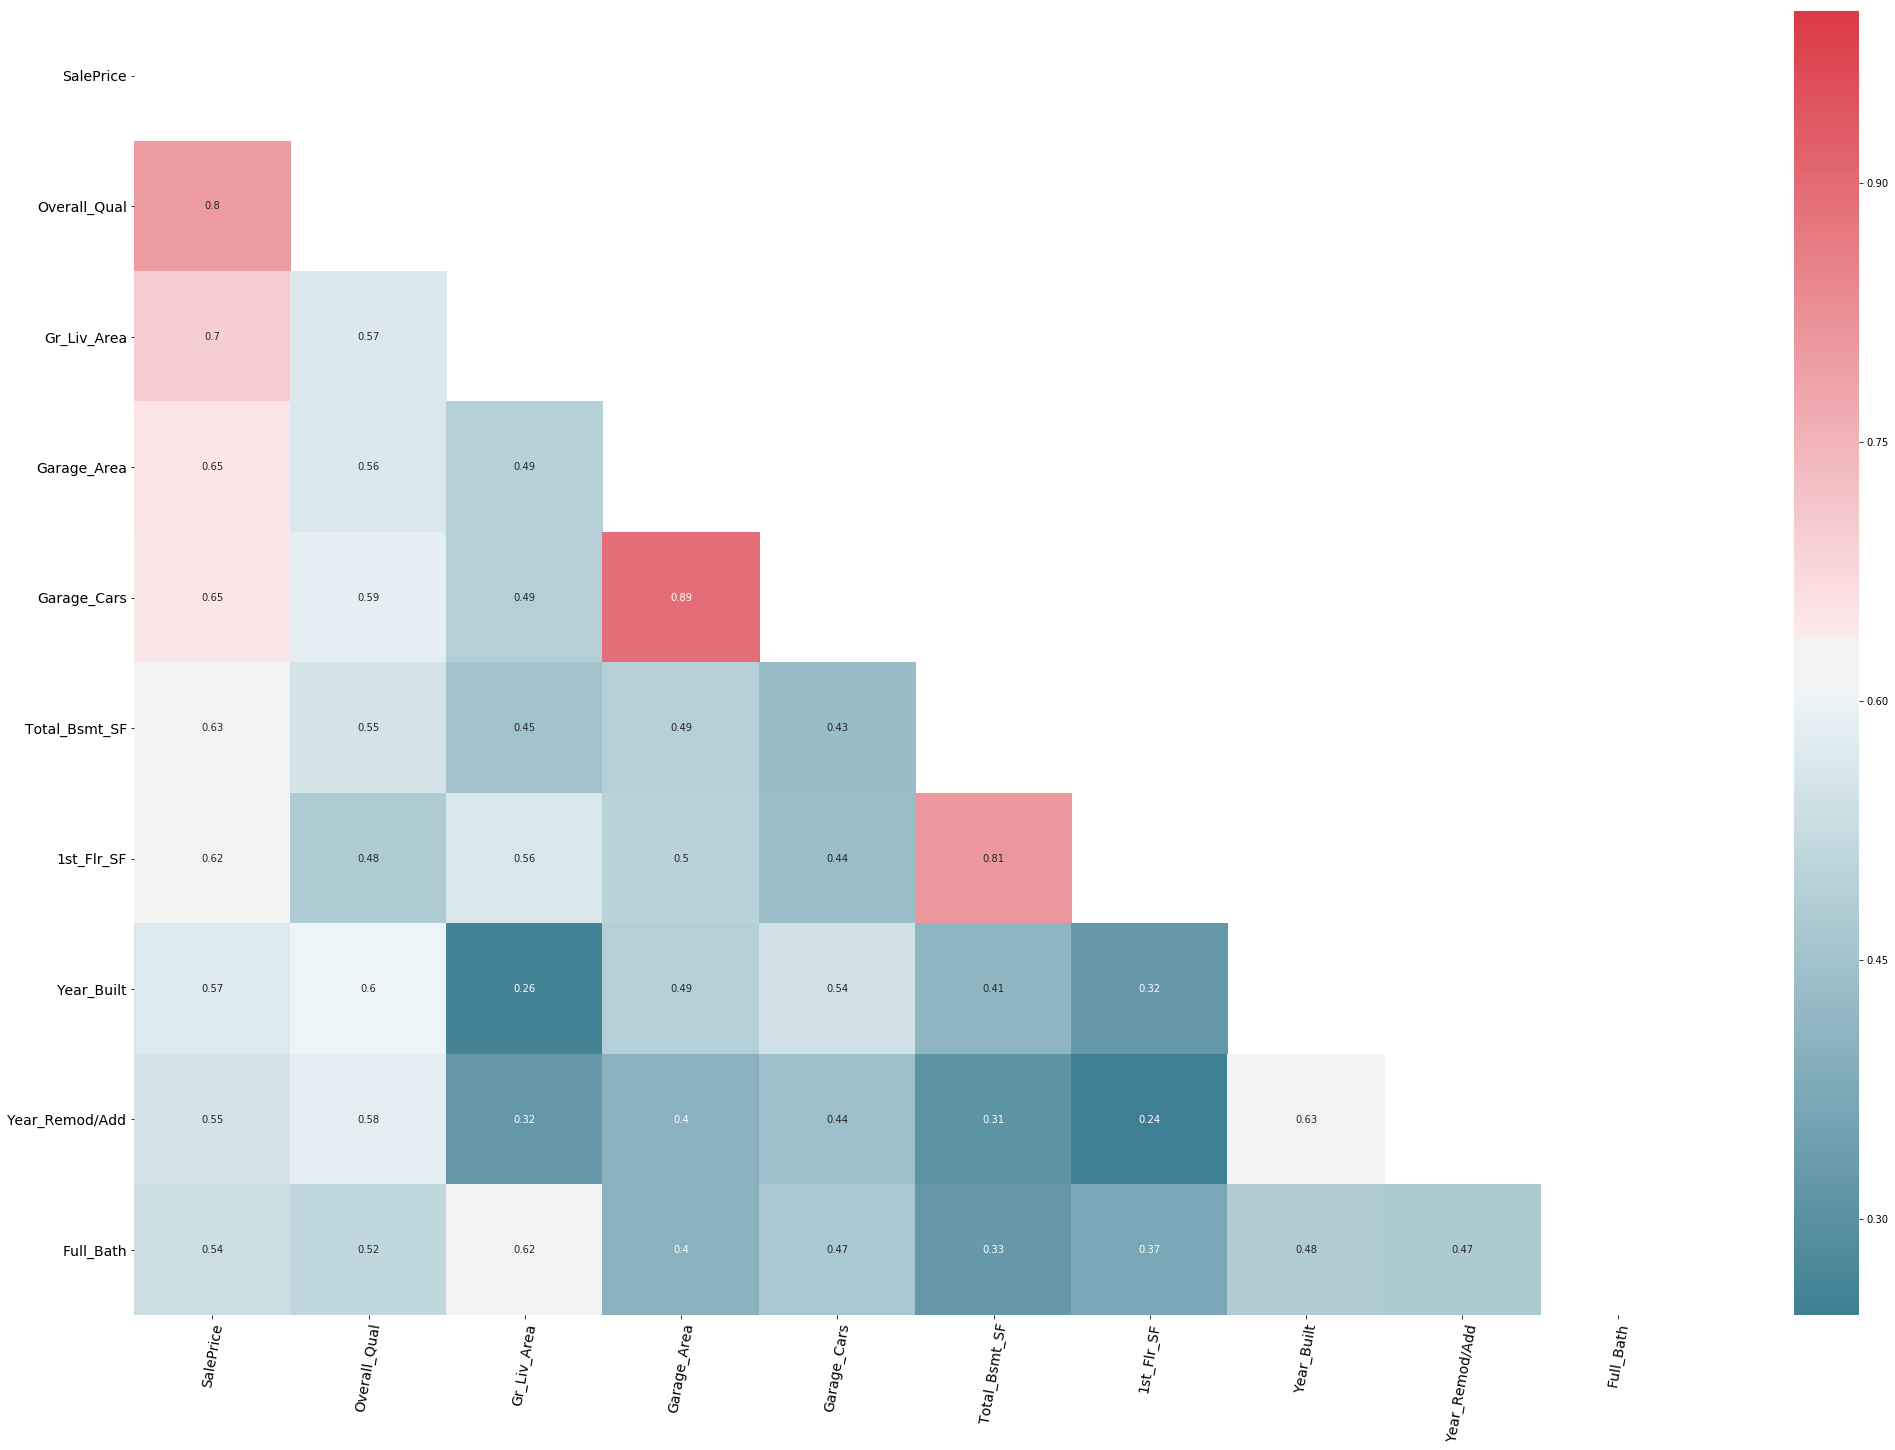

In [15]:
# Now these 10 top correlated features, let's get the correlation among them
indep_correlated = correlation_heat_map(train_data[top_corr_k.index.values])

##### Correlated features:
- 1st_flr_SF and Total_Bsmt_SF 
- Garage_Cars and Garage_Area 
- Year_Remove/Add and Year_Built

So for each pair of correlated features we will choose the highest correlated feature with the target 'SalePrice'

##### Highest correlated features with the target:
'Overall_Qual', 'Gr_Liv_Area','Garage_Cars', 'Total_Bsmt_SF','Year_Built', 'Full_Bath'

#### Relationship between the target and features:

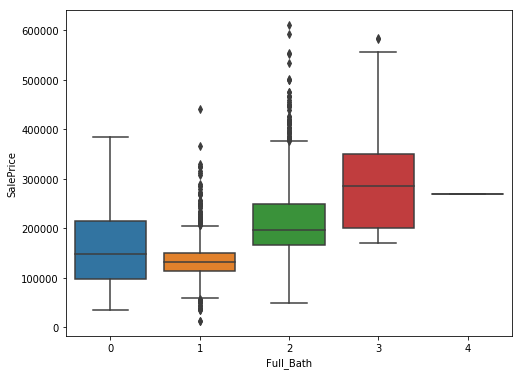

In [16]:
# Full_Bath
fig , ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Full_Bath',
                  y="SalePrice",
                  data=train_data)

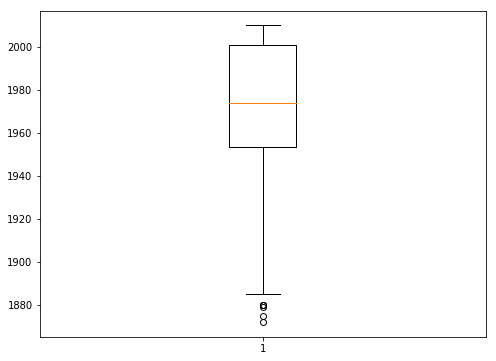

In [17]:
# Total_Bsmt_SF
fig , ax = plt.subplots(figsize=(8, 6))
plt.boxplot(train_data.Year_Built);

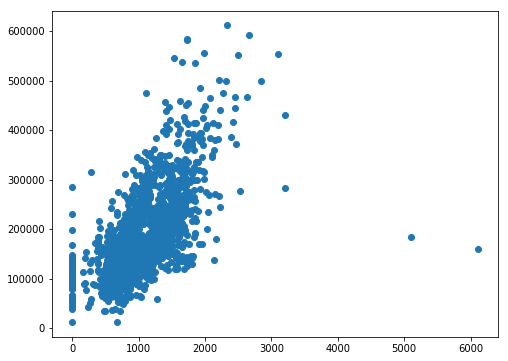

In [18]:
# Total_Bsmt_SF
fig , ax = plt.subplots(figsize=(8, 6))
plt.scatter(train_data.Total_Bsmt_SF,
            train_data.SalePrice)

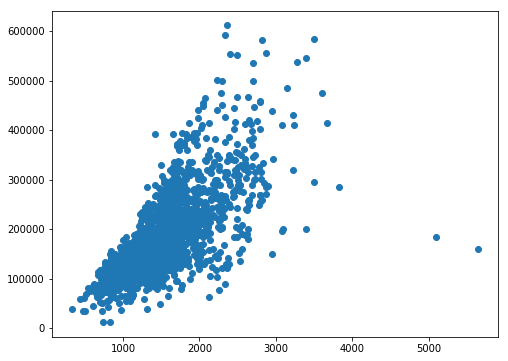

In [19]:
# Gr_Liv_Area
fig , ax = plt.subplots(figsize=(8, 6))
plt.scatter(train_data.Gr_Liv_Area,
            train_data.SalePrice)

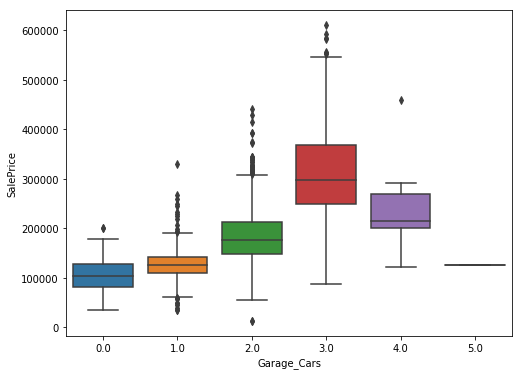

In [20]:
# Garage_Cars
fig , ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Garage_Cars',
                  y="SalePrice",
                  data=train_data)

## Step 2: Cleaning and Manipulate the dataframe

### 1- Check Trainset Outliers:

In [21]:
# Gr_Liv_Area
# Using plots above, we can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.
train_data[train_data.Gr_Liv_Area >4000]

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


In [22]:
# droping them 
train_data.drop(train_data[train_data.Gr_Liv_Area >4000].index,inplace=True)

In [23]:
# independent variables
# drop the  'Id' columns and target columns since it's unnecessary for  the prediction process.
train_features = train_data.drop(['Sale_Condition', 'SalePrice', 'Id', 'PID'],
                                 axis =1)
test_features = test_data.drop(['Id', 'PID'],
                               axis =1)

# dependent (target) variable for regression problem
y = train_data['SalePrice']

In [24]:
# Combine the two datasets (train , test) to fill the missing values and get dummies
# store indexes
ntrain = train_features.shape[0]
ntest = test_features.shape[0]

# full data
all_data = pd.concat((train_features, test_features)).reset_index(drop=True)

In [25]:
all_data.shape

(2928, 78)

### 2- Check Missing values:

In [26]:
# Get columns with missing values 
all_data.isnull().sum().sort_values(ascending=False).head(27)

Pool_QC           2916
Misc_Feature      2823
Alley             2730
Fence             2356
Fireplace_Qu      1422
Lot_Frontage       490
Garage_Yr_Blt      159
Garage_Qual        159
Garage_Cond        159
Garage_Finish      159
Garage_Type        157
Bsmt_Exposure       83
BsmtFin_Type_2      81
BsmtFin_Type_1      80
Bsmt_Cond           80
Bsmt_Qual           80
Mas_Vnr_Type        23
Mas_Vnr_Area        23
Bsmt_Half_Bath       2
Bsmt_Full_Bath       2
Garage_Cars          1
Bsmt_Unf_SF          1
Total_Bsmt_SF        1
BsmtFin_SF_2         1
Electrical           1
BsmtFin_SF_1         1
Garage_Area          1
dtype: int64

##### 1- Pool QC 

In [27]:
# check Pool QC is missing and Pool area is zero
all_data.loc[(all_data.Pool_QC.isnull()) & (all_data.Pool_Area ==0 ),'Pool_QC'].shape[0]

2916

In [28]:
# Data dictionary says NA means "No Pool"
all_data.loc[(all_data.Pool_QC.isnull()) & (all_data.Pool_Area == 0 ), 'Pool_QC'] = 'None'

##### 2- Misc_Feature

In [29]:
# check Misc_Feature is missing and Misc Value is zero
all_data.loc[(all_data.Misc_Feature.isnull()) & (all_data.Misc_Val == 0)].shape[0]

2823

In [30]:
# Data dictionary says NA means "no misc feature"
all_data.loc[(all_data.Misc_Feature.isnull()) & (all_data.Misc_Val == 0), 'Misc_Feature'] = 'None'

#### 3- Alley

In [31]:
all_data.loc[(all_data.Alley.isnull())].shape[0]

2730

In [32]:
# Data dictionary says NA means "no alley access"
all_data.loc[(all_data.Alley.isnull()), 'Alley'] = 'None'

#### 4- Fence

In [33]:
all_data.loc[(all_data.Fence.isnull())].shape[0]

2356

In [34]:
# Data dictionary says NA means "no fence"
all_data.loc[(all_data.Fence.isnull()), 'Fence'] = 'None'

#### 5- Fireplace_Qu

In [35]:
# check Fireplace_Qu is missing and Fireplaces is zero
all_data.loc[(all_data.Fireplace_Qu.isnull()) & (all_data.Fireplaces == 0)].shape[0]

1422

In [36]:
# Data dictionary says NA means "no fireplace"
all_data.loc[(all_data.Fireplace_Qu.isnull()) & (all_data.Fireplaces == 0), 'Fireplace_Qu'] = 'None'

#### 6- Lot_Frontage

In [37]:
# check Lot_Frontage is missing and Lot_Area is bigger than zero
all_data.loc[(all_data.Lot_Frontage.isnull()) & (all_data.Lot_Area > 0)].shape[0]

490

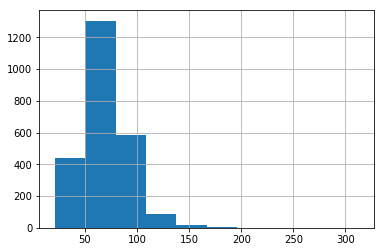

In [38]:
# so we have Lot area for missing Lot_Frontage , need to fill them with median or mean

# Check the distubition
all_data.Lot_Frontage.hist() # shewed right

In [39]:
# since it's right skewed, we can fill in missing values by the median LotFrontage of the neighborhood.
all_data['Lot_Frontage'] = all_data.groupby('Neighborhood')['Lot_Frontage'].fillna(0).transform(lambda x: x.fillna(np.median(x)))

#### 7- Garage Columns

In [40]:
garage_cols = ['Garage_Finish', 'Garage_Cond', 'Garage_Qual',
               'Garage_Yr_Blt', 'Garage_Type', 'Garage_Area',
               'Garage_Cars']

In [41]:
all_data.loc[all_data[garage_cols].isnull().apply(lambda x: any(x), axis=1),garage_cols]

,Garage_Finish,Garage_Cond,Garage_Qual,Garage_Yr_Blt,Garage_Type,Garage_Area,Garage_Cars
28,NaN,NaN,NaN,NaN,NaN,0.0,0.0
53,NaN,NaN,NaN,NaN,NaN,0.0,0.0
65,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
101,NaN,NaN,NaN,NaN,NaN,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0
120,NaN,NaN,NaN,NaN,NaN,0.0,0.0
134,NaN,NaN,NaN,NaN,NaN,0.0,0.0
136,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [42]:
# Check Garage with total area >0
garage_index = all_data.loc[(all_data[garage_cols].isnull().apply(lambda x: any(x) , axis=1)) & \
                   (all_data.Garage_Area > 0), \
                   garage_cols].index
all_data.loc[garage_index, garage_cols]

,Garage_Finish,Garage_Cond,Garage_Qual,Garage_Yr_Blt,Garage_Type,Garage_Area,Garage_Cars
2814,NaN,NaN,NaN,NaN,Detchd,360.0,1.0


In [43]:
# Fill in missing values (with total garage area >0) with mode value or mean group by 'Neighborhood'
for col in garage_cols:
    if all_data.dtypes[col] == "object":
        all_data.loc[garage_index,col] = all_data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mode()[0]))
    else:
        all_data.loc[garage_index,col] = all_data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mean()))

In [44]:
def fill_missing_data(df, col_lst):
    '''
    Function to fill in missing data based on column data type
        *args:
            df: dataframe
            col_lst: list of columns which need to check thier missing values
    '''
    for col in col_lst:
        if df.dtypes[col] == "object":
            df[col] = df[col].fillna('None')
        else:
            df[col] = df[col].fillna(0)

In [45]:
# Fill in remaining rows
fill_missing_data(all_data, garage_cols)

#### 8- Basment Columns

In [46]:
bsmt_cols = ['Bsmt_Cond', 'Bsmt_Qual', 'Bsmt_Exposure',
               'BsmtFin_Type_2', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
               'BsmtFin_SF_2', 'Bsmt_Half_Bath', 'Bsmt_Full_Bath',
               'Total_Bsmt_SF', 'Bsmt_Unf_SF']

In [47]:
all_data.loc[all_data[bsmt_cols].isnull().apply(lambda x: any(x) , axis=1),bsmt_cols]

,Bsmt_Cond,Bsmt_Qual,Bsmt_Exposure,BsmtFin_Type_2,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Half_Bath,Bsmt_Full_Bath,Total_Bsmt_SF,Bsmt_Unf_SF
12,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# bsmt with total bsmt area >0
bsmt_index = all_data.loc[(all_data[bsmt_cols].isnull().apply(lambda x: any(x) , axis=1)) & \
                   (all_data.Total_Bsmt_SF > 0), \
                   bsmt_cols].index
all_data.loc[bsmt_index,bsmt_cols]

,Bsmt_Cond,Bsmt_Qual,Bsmt_Exposure,BsmtFin_Type_2,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Half_Bath,Bsmt_Full_Bath,Total_Bsmt_SF,Bsmt_Unf_SF
1146,TA,Gd,No,NaN,GLQ,1124.0,479.0,0.0,1.0,3206.0,1603.0
1455,TA,Gd,NaN,Unf,Unf,0.0,0.0,0.0,0.0,725.0,725.0
1546,TA,Gd,NaN,Unf,Unf,0.0,0.0,0.0,0.0,1595.0,1595.0
1995,TA,Gd,NaN,Unf,Unf,0.0,0.0,0.0,0.0,936.0,936.0


In [49]:
# Fill in missing values (with total bsmt area >0) with mode value or mean group by 'Neighborhood'
for col in bsmt_cols:
    if all_data.dtypes[col] == "object":
        all_data.loc[bsmt_index,col] = all_data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mode()[0]))
    else:
        all_data.loc[bsmt_index,col] = all_data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mean()))

In [50]:
# Fill in remaining rows
fill_missing_data(all_data, bsmt_cols)

#### 9 - Mas_Vnr_Type , Mas_Vnr_Area

In [51]:
mas_cols = ['Mas_Vnr_Type', 'Mas_Vnr_Area']
all_data.loc[(all_data[mas_cols].isnull().apply(lambda x: any(x) , axis=1)), mas_cols]

,Mas_Vnr_Type,Mas_Vnr_Area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [52]:
# Fill in remaining rows
fill_missing_data(all_data, mas_cols)

#### 10 - Electrical

In [53]:
all_data.loc[all_data.Electrical.isnull()]

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
2684,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,None,None,0,5,2008,WD


In [54]:
# fill with mode
all_data['Electrical'] = all_data.Electrical.fillna(all_data.Electrical.mode()[0])

### 3- Features Engineering:

- Change type of some numerical feaures that are really categorical

In [55]:
all_data['MS_SubClass'] = all_data['MS_SubClass'].apply(str)
all_data['Overall_Cond'] = all_data['Overall_Cond'].astype(str)
all_data['Overall_Qual'] = all_data['Overall_Qual'].astype(str)
all_data['Yr_Sold'] = all_data['Yr_Sold'].astype(str)
all_data['Mo_Sold'] = all_data['Mo_Sold'].astype(str)

- Encode some categorical features as ordered numbers when there is information in the order, Then change their classes range to be small and clear 

In [56]:
cols_1 = ('Fireplace_Qu', 'Bsmt_Qual', 'Bsmt_Cond', 'Garage_Qual', 'Garage_Cond' ,'Garage_Finish', 'Street',
        'Exter_Qual', 'Exter_Cond','Heating_QC', 'Pool_QC', 'Kitchen_Qual', 'BsmtFin_Type_1','Fence', 
        'BsmtFin_Type_2',  'Land_Slope','Lot_Shape', 'Paved_Drive', 'Alley', 'Overall_Cond','Overall_Qual')
cols_2 = ('Functional', 'Central_Air', 'Bsmt_Exposure')

In [57]:
for c in cols_1:
    all_data[c] = all_data[c].replace( {"None":0,"No" : 0,"N" : 0,
                                      "Po" : 1,"Grvl" : 1, "Unf" : 1,"MnWw":1, "P" : 1,"Sev" : 1,"IR3" : 1,
                                      "Fa" : 2,"RFn":2,"Pave" : 2,"LwQ": 2,"GdWo":2, "Y" : 2,"Mod" : 2,"IR2" : 2,
                                      "TA": 3, "Fin":3,"Rec" : 3,"MnPrv":3, "Gtl" : 3, "IR1" : 3,
                                      "Gd" : 4,"BLQ" : 4,"GdPrv":4 , "Reg" : 4,
                                      "Ex" : 5 ,"ALQ" : 5, "GLQ" : 6 })

for c in cols_2:
    all_data[c] = all_data[c].replace( {"No" : 0,"N" : 0,"None" : 0,
                                       "Sal" : 1,"Mn" : 1, "Y" : 1,
                                      "Sev" : 2, "Av": 2,
                                      "Maj2" : 3,"Gd" : 3, 
                                       "Maj1" : 4,
                                       "Mod": 5,
                                      "Min2" : 6,
                                      "Min1" : 7,
                                      "Typ" : 8})  

In [58]:
# Resize columns range 
cols_map1 = ('Overall_Qual','Overall_Cond')
for c in cols_map1:
    all_data[c] = all_data[c].replace({1 : 1, 2 : 1, 3 : 1, # bad
                                       4 : 2, 5 : 2, 6 : 2, # average
                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                       })

    
cols_map2 = ('Garage_Finish','Paved_Drive')
for c in cols_map2:
    all_data[c] = all_data[c].replace({0 : 1, 1 : 1, # bad
                                       2 : 2, 3 : 2 # good
                                       })
    
    
cols_map3 = ('Garage_Cond','Garage_Qual','Fireplace_Qu','Kitchen_Qual','Heating_QC',
             'Bsmt_Cond','Bsmt_Qual','Exter_Cond','Exter_Qual')
for c in cols_map3:
    all_data[c] = all_data[c].replace({1 : 1, # bad
                                       2 : 1, 3 : 1, # average
                                       4 : 2, 5 : 2 # good
                                       })
    
    
cols_map4 = ('BsmtFin_Type_1','BsmtFin_Type_2')
for c in cols_map4:
    all_data[c] = all_data[c].replace({1 : 1, # unfinished
                                       2 : 1, 3 : 1, # rec room
                                       4 : 2, 5 : 2, 6 : 2 # living quarters
                                        })
    
    
cols_map5 = ('Fence','Bsmt_Exposure')
for c in cols_map5:
    all_data[c] = all_data[c].replace({0 : 1,# bad
                                       1 : 1, 2:1, # avarge
                                       3:2 ,4: 2 # good
                                       })
    
    
all_data['Pool_QC'] = all_data['Pool_QC'].replace({1 : 1, 2 : 1, # average
                                                 3 : 2, 4 : 2 # good
                                                 })  


all_data['Functional'] = all_data['Functional'].replace({1 : 1, 2 : 1, # bad
                                       3 : 2, 4 : 2, # major
                                       5 : 3, 6 : 3, 7 : 3, # minor
                                       8 : 4 # typical
                                       })


all_data['Lot_Shape'] = all_data['Lot_Shape'].replace({1 : 1, 2 : 1, 3:1, # bad
                                       4: 2 # good
                                       })

-  As linear models love normally distributed data , we need to check numerical features and transform them and make it more normally distributed

In [59]:
# Numerical features
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

#trainset
train_features = all_data[:ntrain]

# calculate skew of Numerical features
skewed = train_features[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))

# select only features with this threshold
skewed = skewed[skewed > 0.5].index

all_data[skewed]=np.log1p(all_data[skewed])
# #Box Cox Transformation of skewed features (instead of log-transformation)
# lam = 0.15
# all_data[skewed]=boxcox1p(all_data[skewed],lam)

- Getting dummy categorical features

In [60]:
#dummies
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2928, 272)


- Getting the new train and test sets.

In [61]:
# features
train_features = all_data[:ntrain]
test_features = all_data[ntrain:]

# Standrized features 
ss = StandardScaler()
all_data_ss = ss.fit_transform(all_data)
train_features_ss = all_data_ss[:ntrain]
test_features_ss = all_data_ss[ntrain:]

## Step 3: Modeling:

### 1- Linear Regression Model

In [62]:
linear_model = LinearRegression()

linear_model = linear_model.fit(train_features, y)

# make prediction on train set
y_pred_train_lin = linear_model.predict(train_features)
print("Model score on training set: ",
      np.sqrt(mean_squared_error( y, y_pred_train_lin)))

# make prediction on test set
y_pred_lin = linear_model.predict(test_features)

#Get Execl Sheet 
pred = pd.DataFrame({'Id': test_data['Id'],
                     'SalePrice': y_pred_lin})
pred.to_csv('HousePrices_1_6.csv', header=True, index=False)

Model score on training set:  20328.2598167459


### 2- Lasso Regression Model

In [63]:
# LassoCV
#========
lasso_cv_model = LassoCV(cv = 10)

lasso_cv_model.fit(train_features_ss, y)

print("Best alpha :", lasso_cv_model.alpha_)

Best alpha : 193.01197433467064


In [64]:
# Lasso
#====== 
lasso_model = Lasso(alpha=lasso_cv_model.alpha_)

lasso_model = lasso_model.fit(train_features_ss, y)

# make prediction on train set
y_pred_train_lasso = lasso_model.predict(train_features_ss)
print("Model score on training set: ",
      np.sqrt(mean_squared_error( y, y_pred_train_lasso)))

# make prediction on test set
y_pred_lasso = lasso_model.predict(test_features_ss)

#Get Execl Sheet 
pred = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred_lasso})
pred.to_csv('HousePrices_2_7.csv', header=True, index=False)

Model score on training set:  20778.520236463577


### 3- Linear Regression with Lasso Coef

In [65]:
# combine columns names with their non-zero Lasso coefficients
cols_coef_lasso = [(col,coef) for col , coef in list(zip(train_features.columns.values,lasso_model.coef_)) if np.abs(coef) > 0 ]
cols_coef_lasso.sort(key= lambda x : abs(x[1]), reverse=True)

# model
linear_model_lasso_coef = LinearRegression()
linear_model_lasso_coef = linear_model_lasso_coef.fit(train_features[[i[0] for i in cols_coef_lasso]], y)

# make prediction on train set
y_pred_train_lin_2 = linear_model_lasso_coef.predict(train_features[[i[0] for i in cols_coef_lasso]])
print("Model score on training set: ",
      np.sqrt(mean_squared_error( y, y_pred_train_lin_2)))

# make prediction on test set
y_pred_lin_2 = linear_model_lasso_coef.predict(test_features[[i[0] for i in cols_coef_lasso]])

#Get Execl Sheet 
pred = pd.DataFrame({'Id': test_data['Id'],
                     'SalePrice': y_pred_lin_2})
pred.to_csv('HousePrices_3_25.csv', header=True, index=False)

Model score on training set:  20514.59003341241


### 3- Ridge Regression Model

In [66]:
# RidgeCV
#========
ridge_cv_model = RidgeCV(cv = 10)

ridge_cv_model.fit(train_features_ss, y)

print("Best alpha :", ridge_cv_model.alpha_)

Best alpha : 10.0


In [67]:
# Ridge
#====== 
ridge_model = Ridge(alpha=ridge_cv_model.alpha_)
ridge_model = ridge_model.fit(train_features_ss, y)

# make prediction on train set
y_pred_train_ridge = ridge_model.predict(train_features_ss)
print("Model score on training set: ",
      np.sqrt(mean_squared_error( y, y_pred_train_ridge)))


# make prediction on test set
y_pred_ridge = ridge_model.predict(test_features_ss)

#Get Execl Sheet
pred = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred_ridge})
pred.to_csv('HousePrices_3_9.csv', header=True, index=False)

Model score on training set:  20346.119058315944


### 5- ElasticNet Regression Model

In [68]:
# ElasticNetCV
#========
l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1]

elasticNet_cv_model = ElasticNetCV(l1_ratio = l1_ratio,
                                   n_alphas=100 ,
                                   cv = 10)

elasticNet_cv_model.fit(train_features_ss, y)

# Best alpha 
print("Best alpha using ElasticNetCV: %f" % elasticNet_cv_model.alpha_)

# Best l1_ratio
print("Best l1_ratio using ElasticNetCV: %f" % elasticNet_cv_model.l1_ratio_)

Best alpha using ElasticNetCV: 193.011974
Best l1_ratio using ElasticNetCV: 1.000000


In [69]:
# ElasticNet
#====== 

elasticNet_model = ElasticNet(alpha=elasticNet_cv_model.alpha_,
                              l1_ratio=elasticNet_cv_model.l1_ratio_)
elasticNet_model = elasticNet_model.fit(train_features_ss, y)

# make prediction on train set
y_pred_train_elastic = elasticNet_model.predict(train_features_ss)
print("Model score on training set: ",
      np.sqrt(mean_squared_error( y, y_pred_train_elastic)))


# make prediction on test set
y_pred_elastic = elasticNet_model.predict(test_features_ss)

#Get Execl Sheet
pred = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred_elastic})
pred.to_csv('HousePrices_5_10.csv', header=True, index=False)

Model score on training set:  20778.520236463577


### 6- KNN Regression Model

In [329]:
# Graidsearch knn regression
#========
knn_parameters = {
    'n_neighbors':[1, 3, 5, 7, 9, 21, 23],
    'weights':['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

knn_grid_search = GridSearchCV(KNeighborsRegressor(),
                               knn_parameters,
                               cv=10,
                               verbose=1 )

results = knn_grid_search.fit(train_features_ss, y)
results.best_params_

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  9.1min finished


{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

In [330]:
# KNN regression
#====== 
knn_model = KNeighborsRegressor(algorithm='auto',
                                n_neighbors=7,
                                weights='distance')

knn_model = knn_model.fit(train_features_ss, y)

# make prediction on train set
y_pred_train_knn = knn_model.predict(train_features_ss)
print("Model score on training set: ",
      np.sqrt(mean_squared_error( y, y_pred_train_knn)))


# make prediction on test set
y_pred_knn = knn_model.predict(test_features_ss)

#Get Execl Sheet
pred = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred_knn})
pred.to_csv('HousePrices_6_11.csv', header=True, index=False)

Model score on training set:  62.484746796600184


### 7- Ensemble Model

In [70]:
# Ensembling Lasso model and linear model with lasso coef
#=====

# the Target
y_ensemble = 0.25* y_pred_lasso + 0.75 * y_pred_lin_2

#Get Execl Sheet 
pred = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_ensemble})
pred.to_csv('HousePrices_7_4.csv', header=True, index=False)

#### Model with the Highest accuracy is Ensemble Model